# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [5]:
pip install --upgrade plotly

Requirement already up-to-date: plotly in /usr/local/lib/python3.7/dist-packages (4.14.3)


## Import Statements

In [6]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [7]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [8]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [222]:
# Death by police

df_fatalities["date"] = pd.DatetimeIndex(df_fatalities["date"])
print(f"df_fatalities.shape: {df_fatalities.shape}\n")
print(f"df_fatalities.columns: {df_fatalities.columns}\n")
print(f"Duplicates: {df_fatalities.duplicated().any()}\n")
print(f"Missing values: {df_fatalities.isna().values.any()}\n")
df_fatalities.info()



id                         28
name                       28
date                       28
manner_of_death            28
armed                      28
age                        28
gender                     28
race                       28
city                       28
state                      28
signs_of_mental_illness    28
threat_level               28
flee                       28
body_camera                28
dtype: int64

In [14]:
# Median Household income

# df_hh_income

df_hh_income["Median Income"] = pd.to_numeric(df_hh_income["Median Income"], errors="coerce")
# df_hh_income["Median Income"]
print(f"df_hh_income.shape: {df_hh_income.shape}\n")
print(f"df_hh_income.columns: {df_hh_income.columns}\n")
print(f"Duplicates: {df_hh_income.duplicated().any()}\n")
print(f"NaN values: {df_hh_income.isna().values.any()}\n")
print(df_hh_income.info())

df_hh_income = df_hh_income.sort_values("Median Income", ascending=False)
a = df_hh_income.groupby("Geographic Area", as_index=False).agg({"Median Income": pd.Series.mean})
a.sort_values("Median Income", ascending=False)
a.head()


df_hh_income.shape: (29322, 3)

df_hh_income.columns: Index(['Geographic Area', 'City', 'Median Income'], dtype='object')

Duplicates: False

NaN values: True

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29322 entries, 3555 to 29321
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Geographic Area  29322 non-null  object 
 1   City             29322 non-null  object 
 2   Median Income    27385 non-null  float64
dtypes: float64(1), object(2)
memory usage: 916.3+ KB
None


,Geographic Area,Median Income
0,AK,"52,099.59"
1,AL,"40,577.31"
2,AR,"35,593.41"
3,AZ,"42,495.67"
4,CA,"62,097.35"


In [18]:
# Percentage High School over 25

df_pct_completed_hs["percent_completed_hs"] = pd.to_numeric(df_pct_completed_hs["percent_completed_hs"], errors="coerce")

print(f"df_pct_completed_hs.shape: {df_pct_completed_hs.shape}\n")
print(f"df_pct_completed_hs.columns: {df_pct_completed_hs.columns}\n")
print(f"Duplicates: {df_pct_completed_hs.duplicated().any()}\n")
print(f"Missing values: {df_pct_completed_hs.isna().values.any()}\n")
df_pct_completed_hs.info()


df_pct_completed_hs.sample(10)


df_pct_completed_hs.shape: (29329, 3)

df_pct_completed_hs.columns: Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')

Duplicates: False

Missing values: True

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Geographic Area       29329 non-null  object 
 1   City                  29329 non-null  object 
 2   percent_completed_hs  29132 non-null  float64
dtypes: float64(1), object(2)
memory usage: 687.5+ KB


,Geographic Area,City,percent_completed_hs
22603,PA,Newry borough,84.30
1339,AZ,Upper Santan Village CDP,61.90
20006,OH,Orrville city,90.30
18656,NC,South Weldon CDP,61.50
26613,VT,Bethel CDP,90.90
28443,WI,Brownsville village,93.10
17944,NY,Walker Valley CDP,96.00
8884,IA,Robins city,97.40
15140,NE,Campbell village,85.10
7673,IN,Hartsville town,91.80


In [21]:
#  Percentage people below poverty

df_pct_poverty["poverty_rate"] = pd.to_numeric(df_pct_poverty["poverty_rate"], errors="coerce")

print(f"df_pct_poverty.shape: {df_pct_poverty.shape}\n")
print(f"df_pct_poverty.columns: {df_pct_poverty.columns}\n")
print(f"Duplicates: {df_pct_poverty.duplicated().any()}\n")
print(f"Missing values: {df_pct_poverty.isna().values.any()}\n")
df_pct_poverty.info()


df_pct_poverty.sample(10)

df_pct_poverty.shape: (29329, 3)

df_pct_poverty.columns: Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')

Duplicates: False

Missing values: True

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Geographic Area  29329 non-null  object 
 1   City             29329 non-null  object 
 2   poverty_rate     29128 non-null  float64
dtypes: float64(1), object(2)
memory usage: 687.5+ KB


,Geographic Area,City,poverty_rate
22219,PA,Hunker borough,2.20
8512,IA,Henderson city,11.50
28519,WI,Darlington city,11.70
24668,TX,Bloomington CDP,20.60
2174,CA,Channel Islands Beach CDP,2.30
7898,IN,Paragon town,31.00
145,AL,Dutton town,24.20
3530,CO,Cheyenne Wells town,13.00
10061,KY,Lakeview Heights city,8.20
13788,MO,Cainsville city,31.70


In [27]:
## Share of race by city


print(f"df_share_race_city.shape: {df_share_race_city.shape}\n")
print(f"df_share_race_city.columns: {df_share_race_city.columns}\n")
print(f"Duplicates: {df_share_race_city.duplicated().any()}\n")
print(f"Missing values: {df_share_race_city.isna().values.any()}\n")

df_share_race_city["share_white"] = pd.to_numeric(df_share_race_city["share_white"], errors="coerce")
df_share_race_city["share_black"] = pd.to_numeric(df_share_race_city["share_black"], errors="coerce")
df_share_race_city["share_native_american"] = pd.to_numeric(df_share_race_city["share_native_american"], errors="coerce")
df_share_race_city["share_asian"] = pd.to_numeric(df_share_race_city["share_asian"], errors="coerce")
df_share_race_city["share_hispanic"] = pd.to_numeric(df_share_race_city["share_hispanic"], errors="coerce")


# df_share_race_city.info()


df_share_race_city.sample(10)

df_share_race_city.shape: (29268, 7)

df_share_race_city.columns: Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')

Duplicates: False

Missing values: True



,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
11679,MI,Algonac city,97.10,0.30,0.70,0.10,1.30
8489,IA,Harlan city,97.00,0.50,0.40,0.60,1.90
27346,WA,Cashmere city,77.00,0.30,1.00,0.50,28.40
23611,SC,Tega Cay city,92.60,3.00,0.20,2.00,3.30
19078,ND,Sanborn city,99.00,0.00,0.00,0.00,0.00
28766,WI,Nashotah village,96.60,0.10,0.50,1.40,1.40
21348,OR,Port Orford city,93.30,0.60,1.40,0.50,4.30
6623,IL,Hopewell village,97.60,1.50,0.00,0.20,2.00
16031,NJ,Harlingen CDP,77.80,1.70,0.00,16.50,5.70
9395,KS,Humboldt city,94.00,1.40,0.60,0.00,5.10


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [37]:
## Data cleaning

df_fatalities.fillna(0, inplace=True)


print(f"Any duplicates in df_fatalities? {df_fatalities.duplicated().values.any()}")
print(f"Any missing values in df_fatalities? {df_fatalities.isna().values.any()}")

Any duplicates in df_fatalities? False
Any missing values in df_fatalities? False


# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [40]:
## Poverty data by State

poverty_state = df_pct_poverty.groupby("Geographic Area", as_index=False).agg({"poverty_rate": pd.Series.mean})
poverty_state = poverty_state.sort_values("poverty_rate", ascending=True)
# print(poverty_state.head())

max_state = poverty_state.max()["Geographic Area"]
max_rate = poverty_state.max()["poverty_rate"]
print(f"State highest poverty rate: {max_state}, rate: {round(max_rate,2)}")

min_state = poverty_state.min()["Geographic Area"]
min_rate = poverty_state.min()["poverty_rate"]
print(f"State lowest poverty rate: {min_state}, rate: {round(min_rate,2)}")


State highest poverty rate: WY, rate: 26.88
State lowest poverty rate: AK, rate: 8.19


In [44]:
## Chart

fig = px.bar(poverty_state, x="poverty_rate", y="Geographic Area", orientation="h", title="States by poverty rate")

fig.update_layout(width=1000, height=1200)

fig.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [45]:
## Rate of High school graduated by State 


high_school_state = df_pct_completed_hs.groupby("Geographic Area", as_index=False).agg({"percent_completed_hs": pd.Series.mean})
high_school_state = high_school_state.sort_values("percent_completed_hs", ascending=False)


max_state = high_school_state.max()["Geographic Area"]
max_rate = high_school_state.max()["percent_completed_hs"]
print(f"State top high school rate: {max_state}, rate: {round(max_rate,2)}")

min_state = high_school_state.min()["Geographic Area"]
min_rate = high_school_state.min()["percent_completed_hs"]
print(f"State worst high school rate: {min_state}, rate: {round(min_rate,2)}")


State top high school rate: WY, rate: 92.4
State worst high school rate: AK, rate: 75.69


In [48]:
## Chart


fig = px.bar(high_school_state, x="percent_completed_hs", y="Geographic Area", orientation="h", 
             title=" High School Graduation Rate by US State")
fig.update_layout(width=1000, height=1200)

fig.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [76]:
## Poverty rate vs High school rate - US States

poverty_state = poverty_state.sort_values("Geographic Area", ascending=True)
# poverty_state.describe()
high_school_state = high_school_state.sort_values("Geographic Area", ascending=True)

merged_poverty_hs = pd.merge(poverty_state, high_school_state, on="Geographic Area" )
merged_poverty_hs.head()

,Geographic Area,poverty_rate,percent_completed_hs
0,AK,19.85,84.63
1,AL,20.65,80.30
2,AR,22.96,79.95
3,AZ,25.67,80.47
4,CA,17.12,81.96


Text(0, 0.5, 'High School rate')

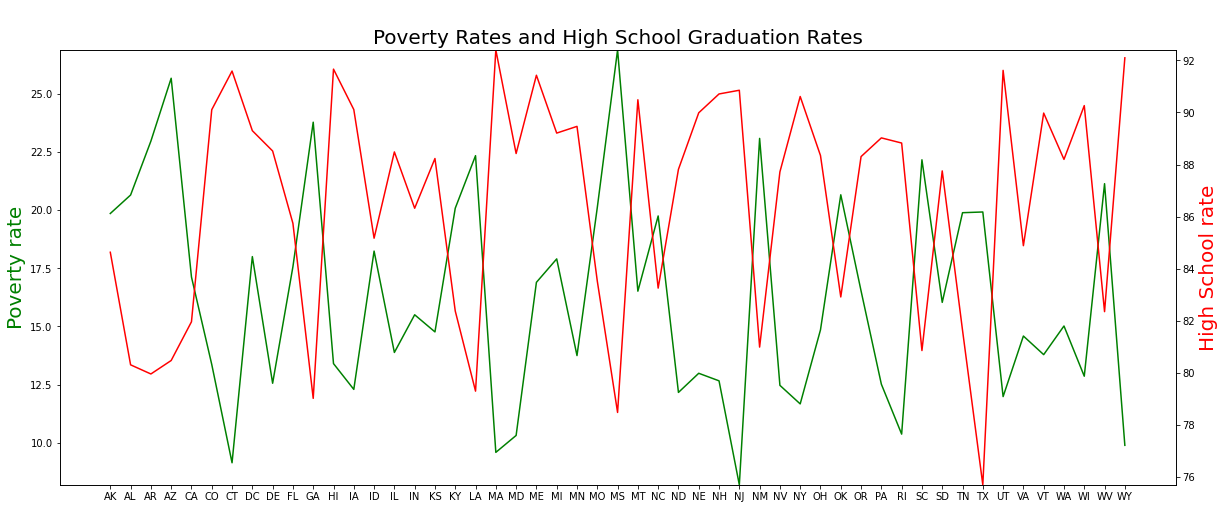

In [307]:
## Chart


plt.figure(figsize=(20, 8))
plt.title("\nPoverty Rates and High School Graduation Rates", fontsize=20)


ax1 = plt.gca()
ax2 = ax1.twinx()


ax1.set_ylim(merged_poverty_hs["poverty_rate"].min(), merged_poverty_hs["poverty_rate"].max())
ax2.set_ylim(merged_poverty_hs["percent_completed_hs"].min(), merged_poverty_hs["percent_completed_hs"].max())


ax1.plot(merged_poverty_hs["Geographic Area"], merged_poverty_hs["poverty_rate"], color="green")
ax2.plot(merged_poverty_hs["Geographic Area"], merged_poverty_hs["percent_completed_hs"], color="red")


ax1.set_ylabel("Poverty rate", color="green", fontsize=20) 
ax2.set_ylabel("High School rate", color="red", fontsize=20)


#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

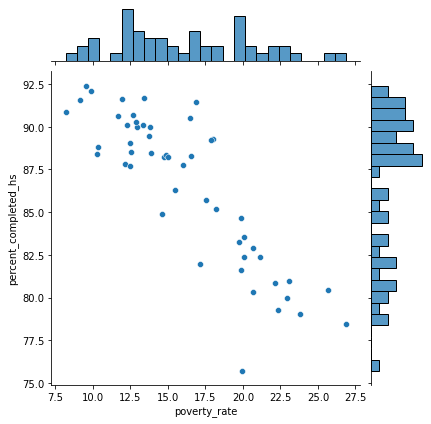

In [ ]:
sns.jointplot(data=merged_poverty_hs, x="poverty_rate", y="percent_completed_hs", 
              marginal_kws=dict(bins=25))

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

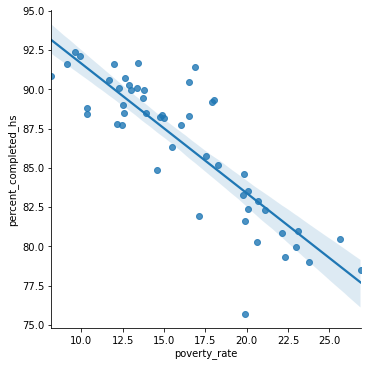

In [81]:
sns.lmplot(data=merged_poverty_hs, x="poverty_rate", y="percent_completed_hs")

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [285]:
df_share_race_city.head()

# df_hh_income.head()
df_share_race_state = df_share_race_city.groupby("Geographic area", as_index=False).agg({"share_white": pd.Series.mean, 
                                                                            "share_black": pd.Series.mean,
                                                                            "share_native_american": pd.Series.mean,
                                                                            "share_asian": pd.Series.mean,
                                                                            "share_hispanic": pd.Series.mean})
df_share_race_state.head()
## WOULD NEED THE ACTUAL CITY-BY-CITY TOT POPULATION TO SOLVE THIS CHALLENGE!

,Geographic area,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AK,45.65,0.57,45.86,1.39,2.15
1,AL,72.51,23.32,0.66,0.48,2.98
2,AR,78.45,16.30,0.76,0.48,4.27
3,AZ,59.93,0.95,28.59,0.73,20.14
4,CA,71.87,2.69,1.72,5.57,29.65


In [290]:
## Chart

list = ["share_white", "share_black", "share_native_american", "share_asian",
        "share_hispanic"]

h_bar = px.bar(df_share_race_state, y="Geographic area", x=list, orientation="h", width=2000, height=1500, title="State ethnicity composition, WITH AVAILABLE DATA")
h_bar.show()


# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [94]:
## People killed by race

death_race = df_fatalities.groupby("race", as_index=False).agg({"id": pd.Series.count})


In [122]:
## Chart

px.pie(labels=death_race["race"],
       values=death_race["id"],
       hole=0.4,
       names=death_race["race"], 
       title="Casualties by ethnicity")

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [95]:
## Deaths by gender

men_women = df_fatalities["gender"].value_counts()
# men_women = df_fatalities.groupby("gender", as_index=False).agg({"id": pd.Series.count})
men_women.head()


M    2428
F     107
Name: gender, dtype: int64

In [121]:
## Chart

px.pie(labels=men_women.index,
       values=men_women.values,
       names=men_women.index, 
       title="Casualties by gender")

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

In [97]:
## Gender, Age, Manner of death data

gender_age_manner = df_fatalities.groupby(["gender", "manner_of_death", "age"], as_index=False).agg({"id": pd.Series.count})
men = gender_age_manner[gender_age_manner["gender"] == "M"]
women = gender_age_manner[gender_age_manner["gender"] == "F"]


In [98]:
tot_men = men['id'].sum()
tot_shot_men = round(men[men["manner_of_death"] == "shot"]['id'].sum() / tot_men *100, 2)
tot_tas_men = round(men[men["manner_of_death"] == "shot and Tasered"]['id'].sum() / tot_men *100, 2)

tot_women = women['id'].sum()
tot_shot_women = round(women[women["manner_of_death"] == "shot"]["id"].sum() / tot_women *100, 2)
tot_tas_women = round(women[women["manner_of_death"] == "shot and Tasered"]["id"].sum() / tot_women *100, 2)


In [120]:
## Chart

fig_men = px.box(data_frame=men, x="age", y="manner_of_death", color="gender", title="Manner of death age distribution - Men")
fig_men.show()

fig_women = px.box(data_frame=women, x="age", y="manner_of_death", color="gender", title="Manner of death age distribution - Women")
fig_women.show()



# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [107]:
## Armed casualties data

tot_deaths = df_fatalities["id"].count() 
unarmed = df_fatalities[(df_fatalities.armed == "unarmed")]["id"].count() + df_fatalities[(df_fatalities.armed == 0)]["id"].count() 
pct_unarmed = round(unarmed / tot_deaths *100, 2)
print(f"Unarmed casualties: {pct_unarmed}%")

armed = df_fatalities[(df_fatalities.armed != "unarmed") & (df_fatalities.armed != 0)]["id"].count()
pct_armed = round(armed / tot_deaths *100, 2)
print(f"Armed casualties: {pct_armed}%")

armed_guns = df_fatalities[(df_fatalities.armed == "gun")]["id"].count()
pct_armed_gun = round(armed_guns / tot_deaths *100, 2)
print(f"Armed with gun casualties: {pct_armed_gun}%")

Unarmed casualties: 7.1%
Armed casualties: 92.9%
Armed with gun casualties: 55.15%


In [117]:
## Weapons data

df_armed = df_fatalities[(df_fatalities.armed != "unarmed")& (df_fatalities.armed != 0)]
weapons = df_armed.groupby("armed", as_index=False).agg({"id": pd.Series.count})
weapons = weapons.rename(columns={"armed": "Weapon", "id": "Cases"})

weapons = weapons.sort_values("Cases", ascending=True)[-15:]
weapons.tail()

,Weapon,Cases
63,toy weapon,104
64,undetermined,117
66,vehicle,177
32,knife,373
25,gun,1398


In [119]:
## Chart

plt.figure(figsize=(15, 15))

h_bar = px.bar(weapons, x="Cases", y="Weapon", orientation="h", title="Armed casualties by weapon")
h_bar.show()

<Figure size 1080x1080 with 0 Axes>

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [123]:
## Casualties under 25

df_under_25 = df_fatalities[df_fatalities["age"] <= 25]
unknown_age = df_under_25[df_under_25.age == 0]

pct_under_25 = round((len(df_under_25) - len(unknown_age)) / len(df_fatalities) *100, 2)

print(f"Casualties under 25: {pct_under_25}%")


Casualties under 25: 21.81%


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

In [153]:
df_age = df_fatalities.groupby("age", as_index=False).agg({"id": pd.Series.count})
df_age = df_age[df_age["age"] !=0]


px.histogram(df_age, x="age", y="id", nbins=100, barmode="group", title="Casualties distribution by age")

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

In [182]:


df_race = df_fatalities.groupby(["race", "age"], as_index=False).agg({"id": pd.Series.count})
df_race = df_race.rename(columns={"id": "casualties"})
df_race.head()

races = df_race["race"].unique() 
races
# # for i in races:

# # White
# w = df_race[df_race["race"] == "W"]
# p = sns.kdeplot(x=w["age"], y=w["casualties"]).set(title="White casualties")



array([0, 'A', 'B', 'H', 'N', 'O', 'W'], dtype=object)

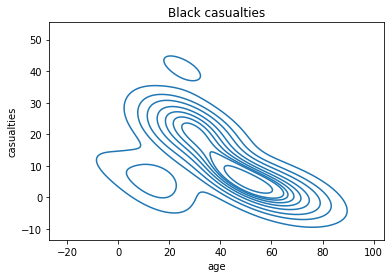

In [180]:
# Black
b = df_race[df_race["race"] == "B"]
f = sns.kdeplot(x=b["age"], y=b["casualties"]).set(title="Black casualties")

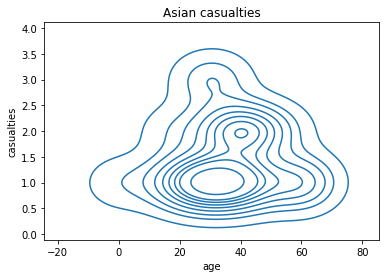

In [181]:
# Asian
a = df_race[df_race["race"] == "A"]
f = sns.kdeplot(x=a["age"], y=a["casualties"]).set(title="Asian casualties")

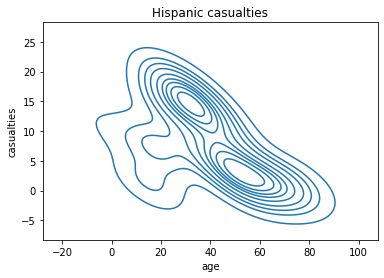

In [183]:
# Hispanic
h = df_race[df_race["race"] == "H"]
f = sns.kdeplot(x=h["age"], y=h["casualties"]).set(title="Hispanic casualties")


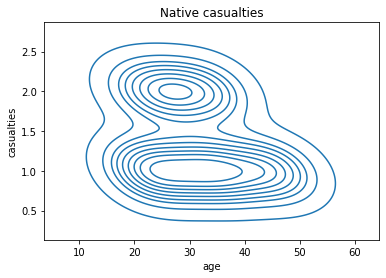

In [184]:
# Native
n = df_race[df_race["race"] == "N"]
f = sns.kdeplot(x=n["age"], y=n["casualties"]).set(title="Native casualties")

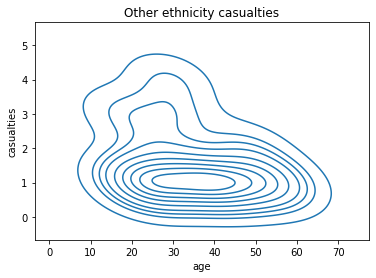

In [185]:
# Other
o = df_race[df_race["race"] == "O"]
f = sns.kdeplot(x=o["age"], y=o["casualties"]).set(title="Other ethnicity casualties")

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

In [192]:
df_race = df_race.groupby("race", as_index=False).agg({"casualties": pd.Series.sum}) 
df_race = df_race.sort_values("casualties", ascending=True)
px.bar(df_race, y="race", x="casualties", orientation="h")

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [193]:
## Sign of mental illness over casualties

mental_issues = len(df_fatalities[df_fatalities["signs_of_mental_illness"] == True])
pct_mental_issues = round(mental_issues / len(df_fatalities) *100, 2)

print(f"Percentage of casualties diagnosed with sign of mental issues over total: {pct_mental_issues}%")

Percentage of casualties diagnosed with sign of mental issues over total: 24.97%


# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [194]:
## Top 10 cities for police killing

df_cities = df_fatalities["city"].value_counts()
top10_cities = df_cities[:10]
top10_cities = top10_cities.sort_values(ascending=True)

# df_fatalities[df_fatalities["city"] == "New York"].count()

In [196]:
h_bar = px.bar(y=top10_cities.index, x=top10_cities.values, orientation="h", title="Top 10 cities by Police killings")
h_bar.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [ ]:
## Dataframe for top 10 cities

# df_cities = df_fatalities.groupby(["race", "city"], as_index=False).agg({"id": pd.Series.count})
df_cities

top10_cities_list = top10_cities.index
top10_cities_list

df_top10_cities = df_fatalities[df_fatalities["city"].isin(top10_cities_list)]
df_top10_cities.head()


In [265]:
## Augment dataset with total casualties by cities

tot_city = df_fatalities.groupby("city", as_index=False).agg({"id": pd.Series.count}) 
tot_city.rename(columns={"id": "tot_city"}, inplace=True)
tot_city
merged_df = pd.merge(df_fatalities, tot_city, on="city")

merged_df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,tot_city
0,3,Tim Elliot,2015-02-01,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False,1
1,4,Lewis Lee Lembke,2015-02-01,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False,2
2,890,Phyllis Ilene Jepsen,2015-02-10,shot,knife,55.00,F,W,Aloha,OR,True,other,Not fleeing,False,2
3,5,John Paul Quintero,2015-03-01,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False,4
4,765,Nicholas Garner,2015-08-22,shot,vehicle,26.00,M,W,Wichita,KS,False,attack,Car,False,4


In [225]:
## Chart

df_sunburst = merged_df.groupby(["city", "race", "tot_city"], as_index=False).agg({"id": pd.Series.count}) 
a = df_sunburst[df_sunburst["city"].isin(top10_cities_list)]
a = a.sort_values("tot_city", ascending=True)


fig = px.bar(a, y="city", x="id", color="race", orientation="h", title="Top 10 cities for police casualties, by race")
fig.show()

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [266]:
## Casualties by State


print(merged_df.head())
df_state = merged_df.groupby(["state"], as_index=False).agg({"id": pd.Series.count})
print(df_state.head())


df_state = df_state.rename(columns=({"id": "casualties"}))
df_state = df_state.sort_values("casualties", ascending=False)
print(df_state.head())


merged_df = pd.merge(merged_df, df_state, on="state")
print(merged_df.head())
# merged_df.drop(["id_x", "id_y_x",  "casualties_x", "casualties_y"], axis=0, inplace=True)


    id                  name       date  ...         flee body_camera  tot_city
0    3            Tim Elliot 2015-02-01  ...  Not fleeing       False         1
1    4      Lewis Lee Lembke 2015-02-01  ...  Not fleeing       False         2
2  890  Phyllis Ilene Jepsen 2015-02-10  ...  Not fleeing       False         2
3    5    John Paul Quintero 2015-03-01  ...  Not fleeing       False         4
4  765       Nicholas Garner 2015-08-22  ...          Car       False         4

[5 rows x 15 columns]
  state   id
0    AK   15
1    AL   50
2    AR   26
3    AZ  118
4    CA  424
   state  casualties
4     CA         424
43    TX         225
9     FL         154
3     AZ         118
35    OH          79
     id                      name       date  ... body_camera tot_city  casualties
0     3                Tim Elliot 2015-02-01  ...       False        1          62
1  2274  Mi'Chance Dunlap-Gittens 2017-01-28  ...       False        5          62
2  2449            William Stokes 2017-03-23

In [269]:
## Chart 

px.choropleth(merged_df,
              locations="state",
              color="casualties",
              locationmode="USA-states", 
              title="Police killings by State")

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [271]:
## Add year column

df_fatalities["year"] = df_fatalities["date"].dt.year
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,year
0,3,Tim Elliot,2015-02-01,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False,2015
1,4,Lewis Lee Lembke,2015-02-01,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False,2015
2,5,John Paul Quintero,2015-03-01,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False,2015
3,8,Matthew Hoffman,2015-04-01,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False,2015
4,9,Michael Rodriguez,2015-04-01,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False,2015


In [276]:
## Data for the chart

plot_data = df_fatalities.groupby(["date"], as_index=False).agg({"id": pd.Series.count})
plot_data.rename(columns=({"id": "casualties"}), inplace=True)

plot_data["rol_avg"] = plot_data.rolling(window=20).mean()
plot_data

,date,casualties,rol_avg
0,2015-01-03,3,nan
1,2015-01-04,2,nan
2,2015-01-06,1,nan
3,2015-01-07,2,nan
4,2015-01-08,2,nan
...,...,...,...
874,2017-12-03,2,3.00
875,2017-12-04,1,2.95
876,2017-12-05,4,2.85
877,2017-12-06,4,2.90


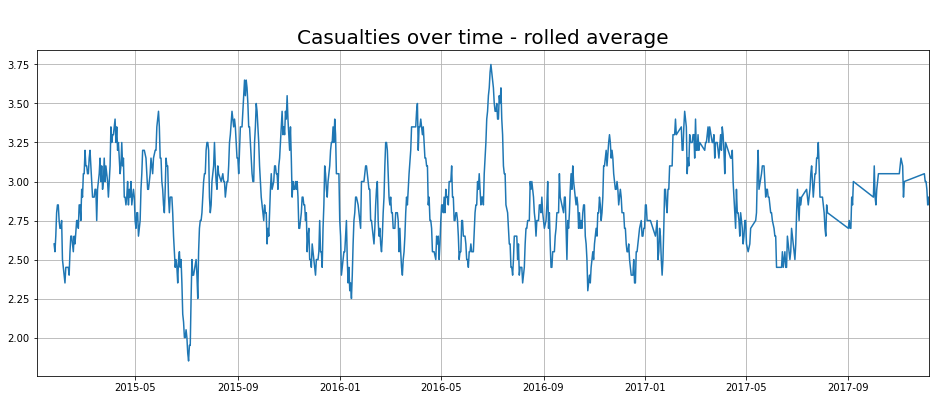

In [281]:
## Chart

plt.figure(figsize=(16, 6))
plt.title("\nCasualties over time - rolled average", fontsize=20)

plt.grid("darkgridlines")
plt.xlim(plot_data["date"].min(), plot_data["date"].max() )

plt.plot(plot_data["date"], plot_data["rol_avg"])


# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).